Laura Michel Bolivar


**Importar csv de Google Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importar librerías**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df =pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/DataScience/DataSet's/prestamos_records.csv")

Verificar Cantidad de datos existentes 


In [4]:
df.shape

(8000, 7)

Se cambiaron los valores NaN por 0 

In [76]:
df_filtrado = df.fillna(0) 
print(df_filtrado.shape) 

(8000, 7)


In [82]:
df_filtrado.head()

,RECORD_CREATION_DATE,MONTO_DEL_PRESTAMO,RANGO_DEL_CREDITO,DEUDA_EXISTENTE,NOTAS_DEL_AGENTE,UBICACION_DE_LA_OFICINA,PRESTAMO_INCUMPLIDO,INTERES_DEL_PRESTAMO,Total
0,01May2014:09:24:27.000000,2500,760-779,"$10,001-$20,000",0,NORTHERN CALIFORNIA,FALSO,2500,0
1,01May2014:09:48:36.000000,2500,700-719,"$1-$10,000","Ingreso anual neto: $25,400",SOUTHERN CALIFORNIA,FALSO,5000,2500
2,01May2014:10:10:36.000000,6300,740-759,"$100,000+",0,ARIZONA,VERDADERO,6300,0
3,01May2014:10:31:25.000000,4300,780-799,"$1-$10,000","Ingreso anual neto: $191,900",SOUTHERN CALIFORNIA,FALSO,4300,0
4,01May2014:10:46:54.000000,20100,780-799,"$90,001-$100,000","Pagos mensuales de deuda verificados: $1,700",SOUTHERN CALIFORNIA,VERDADERO,20100,0


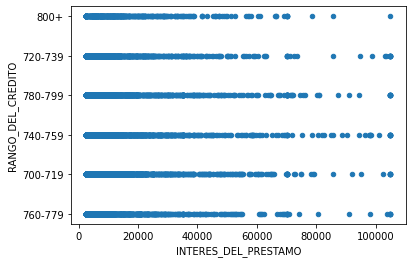

In [93]:
df_filtrado.plot(kind="scatter" , x="INTERES_DEL_PRESTAMO", y="RANGO_DEL_CREDITO")
plt.show() 

Se filtraron los datos por MONTO_DEL_PRESTAMO mayor o igual a 2500 , PRESTAMO_INCUMPLIDO sea falso y UBICACION_DE_LA_OFICINA sea SOUTHERN CALIFORNIA

In [94]:
df_filtrado[(df_filtrado['MONTO_DEL_PRESTAMO']>=2500) & (df_filtrado['PRESTAMO_INCUMPLIDO'].str.contains("FALSO") 
& df_filtrado['UBICACION_DE_LA_OFICINA'].str.contains("SOUTHERN CALIFORNIA"))]

,RECORD_CREATION_DATE,MONTO_DEL_PRESTAMO,RANGO_DEL_CREDITO,DEUDA_EXISTENTE,NOTAS_DEL_AGENTE,UBICACION_DE_LA_OFICINA,PRESTAMO_INCUMPLIDO,INTERES_DEL_PRESTAMO,Total
1,01May2014:09:48:36.000000,2500,700-719,"$1-$10,000","Ingreso anual neto: $25,400",SOUTHERN CALIFORNIA,FALSO,5000,2500
3,01May2014:10:31:25.000000,4300,780-799,"$1-$10,000","Ingreso anual neto: $191,900",SOUTHERN CALIFORNIA,FALSO,4300,0
7,01May2014:11:53:24.000000,10000,760-779,"$20,001-$30,000",0,SOUTHERN CALIFORNIA,FALSO,20000,10000
10,01May2014:12:52:26.000000,13000,720-739,"$10,001-$20,000",0,SOUTHERN CALIFORNIA,FALSO,13000,0
14,01May2014:13:57:11.000000,5900,780-799,"$20,001-$30,000",0,SOUTHERN CALIFORNIA,FALSO,17700,11800
...,...,...,...,...,...,...,...,...,...
7946,06May2015:10:46:30.000000,5500,780-799,0,"Ingreso anual neto: $48,300",SOUTHERN CALIFORNIA,FALSO,16500,11000
7957,06May2015:14:32:30.000000,6700,760-779,"$100,000+",0,SOUTHERN CALIFORNIA,FALSO,6700,0
7969,06May2015:18:25:17.000000,3200,740-759,0,El cliente no tiene deuda,SOUTHERN CALIFORNIA,FALSO,6400,3200
7995,07May2015:16:04:54.000000,3500,700-719,0,El cliente no tiene deuda...Ingreso anual neto...,SOUTHERN CALIFORNIA,FALSO,7000,3500


Se creo una nueva columna llamada **INTERES_DEL_PRESTAMO**

In [78]:
import random
def interes(MONTO_DEL_PRESTAMO):
    interes= MONTO_DEL_PRESTAMO * random.randint(1,3)
    return interes
df_filtrado["INTERES_DEL_PRESTAMO"] = df_filtrado["MONTO_DEL_PRESTAMO"].apply(interes)
df_filtrado.head()

,RECORD_CREATION_DATE,MONTO_DEL_PRESTAMO,RANGO_DEL_CREDITO,DEUDA_EXISTENTE,NOTAS_DEL_AGENTE,UBICACION_DE_LA_OFICINA,PRESTAMO_INCUMPLIDO,INTERES_DEL_PRESTAMO
0,01May2014:09:24:27.000000,2500,760-779,"$10,001-$20,000",0,NORTHERN CALIFORNIA,FALSO,2500
1,01May2014:09:48:36.000000,2500,700-719,"$1-$10,000","Ingreso anual neto: $25,400",SOUTHERN CALIFORNIA,FALSO,5000
2,01May2014:10:10:36.000000,6300,740-759,"$100,000+",0,ARIZONA,VERDADERO,6300
3,01May2014:10:31:25.000000,4300,780-799,"$1-$10,000","Ingreso anual neto: $191,900",SOUTHERN CALIFORNIA,FALSO,4300
4,01May2014:10:46:54.000000,20100,780-799,"$90,001-$100,000","Pagos mensuales de deuda verificados: $1,700",SOUTHERN CALIFORNIA,VERDADERO,20100


Se creo la columna Total teniendo en cuenta la columna creada anteriormenete INTERES_DEL_PRESTAMO  menos MONTO_DEL_PRESTAMO

In [ ]:
def total(fila):
  resul=fila["INTERES_DEL_PRESTAMO"]-fila['MONTO_DEL_PRESTAMO']
  return resul
df_filtrado["Total"]= df_filtrado.apply(total, axis=1)
df_filtrado.head()

Se asignaron diferentes operaciones a las columnas las cuales se agruparon por UBICACION_DE_LA_OFICINA

In [89]:
grupo =df_filtrado.groupby("UBICACION_DE_LA_OFICINA").agg({
    "MONTO_DEL_PRESTAMO": 'sum',
    "INTERES_DEL_PRESTAMO": 'mean',
    "Total":'max'
})
grupo.head()

,MONTO_DEL_PRESTAMO,INTERES_DEL_PRESTAMO,Total
UBICACION_DE_LA_OFICINA,,,
ARIZONA,10612900,13073.719926,70000
NEVADA,6758500,13121.366699,70000
NORTHERN CALIFORNIA,11324600,13221.049563,70000
OREGON,4713900,12370.198675,70000
SOUTHERN CALIFORNIA,13573600,12875.811069,70000


Se filtraron los datos con la agrupacion de datos realizada anteriormente

In [95]:
grupo[grupo["MONTO_DEL_PRESTAMO"]>10612900]

,MONTO_DEL_PRESTAMO,INTERES_DEL_PRESTAMO,Total
UBICACION_DE_LA_OFICINA,,,
NORTHERN CALIFORNIA,11324600,13221.049563,70000
SOUTHERN CALIFORNIA,13573600,12875.811069,70000


**Grafico de Lineas**

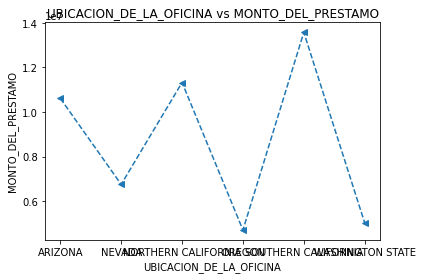

In [81]:
grupo["MONTO_DEL_PRESTAMO"].plot(marker='<', linestyle='--' )
plt.ylabel('MONTO_DEL_PRESTAMO')  
plt.title ('UBICACION_DE_LA_OFICINA vs MONTO_DEL_PRESTAMO')  
plt.show()

**Grafico de Barras**

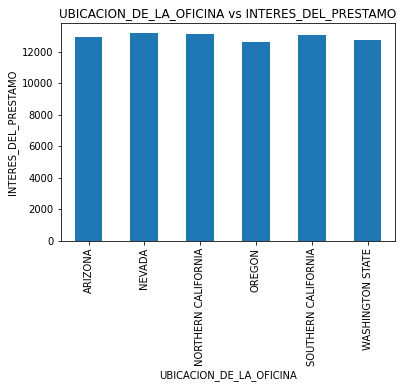

In [74]:
grupo["INTERES_DEL_PRESTAMO"].plot(kind='bar')
plt.ylabel('INTERES_DEL_PRESTAMO')   
plt.title ('UBICACION_DE_LA_OFICINA vs INTERES_DEL_PRESTAMO')  
plt.show()